In [7]:
import string 
from autocorrect import Speller
from collections import Counter
import matplotlib.pyplot as plt
text = open('letter_to_sunak.txt', encoding = 'utf-8').read()
lower_case = text.lower() #text made to lowercase.
raw_text = lower_case.translate(str.maketrans('','', string.punctuation))#removing punctuations
print(raw_text)

dear prime minister

thank you for your phone call yesterday morning in which you asked me to leave government while disappointing this is for the best

it has been my privilege to serve as home secretary and deliver on what the british people have sent us to westminster to do

i want to thank all of those civil servants police border force officers and security professionals with whom i have worked and whose dedication to public safety is exemplary

i am proud of what we achieved together delivering on our manifesto pledge to recruit 20000 new police officers and enacting new laws such as the public order act 2023 and the national security act 2023 i also led a programme of reform on antisocial behaviour police dismissals and standards reasonable lines of enquiry grooming gangs knife crime noncrime hate incidents and rape and serious sexual offences

and i am proud of the strategic changes that i was delivering to prevent contest serious organised crime and fraud i am sure that this w

In [8]:
#Spelling corrected using speller library.
spell = Speller(lang='en')
cleaned_text=spell(raw_text)
print(cleaned_text)

dear prime minister

thank you for your phone call yesterday morning in which you asked me to leave government while disappointing this is for the best

it has been my privilege to serve as home secretary and deliver on what the british people have sent us to westminster to do

i want to thank all of those civil servants police border force officers and security professionals with whom i have worked and whose dedication to public safety is exemplary

i am proud of what we achieved together delivering on our manifesto pledge to recruit 20000 new police officers and enacting new laws such as the public order act 2023 and the national security act 2023 i also led a programme of reform on antisocial behaviour police dismissals and standards reasonable lines of enquiry grooming gangs knife crime noncrime hate incidents and rape and serious sexual offences

and i am proud of the strategic changes that i was delivering to prevent contest serious organised crime and fraud i am sure that this w

In [9]:
##Tokenization

tokenise_words = cleaned_text.split()
print(tokenise_words)




['dear', 'prime', 'minister', 'thank', 'you', 'for', 'your', 'phone', 'call', 'yesterday', 'morning', 'in', 'which', 'you', 'asked', 'me', 'to', 'leave', 'government', 'while', 'disappointing', 'this', 'is', 'for', 'the', 'best', 'it', 'has', 'been', 'my', 'privilege', 'to', 'serve', 'as', 'home', 'secretary', 'and', 'deliver', 'on', 'what', 'the', 'british', 'people', 'have', 'sent', 'us', 'to', 'westminster', 'to', 'do', 'i', 'want', 'to', 'thank', 'all', 'of', 'those', 'civil', 'servants', 'police', 'border', 'force', 'officers', 'and', 'security', 'professionals', 'with', 'whom', 'i', 'have', 'worked', 'and', 'whose', 'dedication', 'to', 'public', 'safety', 'is', 'exemplary', 'i', 'am', 'proud', 'of', 'what', 'we', 'achieved', 'together', 'delivering', 'on', 'our', 'manifesto', 'pledge', 'to', 'recruit', '20000', 'new', 'police', 'officers', 'and', 'enacting', 'new', 'laws', 'such', 'as', 'the', 'public', 'order', 'act', '2023', 'and', 'the', 'national', 'security', 'act', '2023', 

In [10]:
#Removing common stop words.
stop_words = [
    'a',
    'an',
    'and',
    'are',
    'as',
    'at',
    'be',
    'by',
    'for',
    'from',
    'has',
    'he',
    'in',
    'is',
    'it',
    'its',
    'of',
    'on',
    'that',
    'the',
    'to',
    'was',
    'were',
    'will',
    'with'
]

final_words = []
for word in tokenise_words:
    if word not in stop_words:
        final_words.append(word)
print(final_words)


['dear', 'prime', 'minister', 'thank', 'you', 'your', 'phone', 'call', 'yesterday', 'morning', 'which', 'you', 'asked', 'me', 'leave', 'government', 'while', 'disappointing', 'this', 'best', 'been', 'my', 'privilege', 'serve', 'home', 'secretary', 'deliver', 'what', 'british', 'people', 'have', 'sent', 'us', 'westminster', 'do', 'i', 'want', 'thank', 'all', 'those', 'civil', 'servants', 'police', 'border', 'force', 'officers', 'security', 'professionals', 'whom', 'i', 'have', 'worked', 'whose', 'dedication', 'public', 'safety', 'exemplary', 'i', 'am', 'proud', 'what', 'we', 'achieved', 'together', 'delivering', 'our', 'manifesto', 'pledge', 'recruit', '20000', 'new', 'police', 'officers', 'enacting', 'new', 'laws', 'such', 'public', 'order', 'act', '2023', 'national', 'security', 'act', '2023', 'i', 'also', 'led', 'programme', 'reform', 'antisocial', 'behaviour', 'police', 'dismissals', 'standards', 'reasonable', 'lines', 'enquiry', 'grooming', 'gangs', 'knife', 'crime', 'noncrime', 'h

[' fearless', ' attracted', ' average', ' hated', ' hated', ' attracted', ' entitled', ' happy', ' alone', ' fearless', ' powerless', ' anxious', ' powerless', ' powerless', ' loved', ' average', ' entitled', ' hated', ' esteemed']
Counter({' hated': 3, ' powerless': 3, ' fearless': 2, ' attracted': 2, ' average': 2, ' entitled': 2, ' happy': 1, ' alone': 1, ' anxious': 1, ' loved': 1, ' esteemed': 1})


<function matplotlib.pyplot.show(close=None, block=None)>

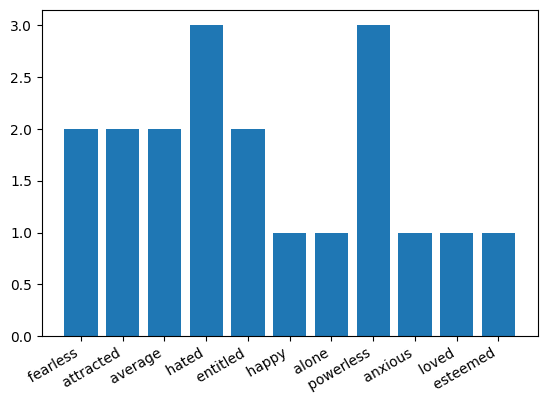

In [11]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()#Removing spaces and punctuations
        word, emotion = clear_line.split(':') #To extract each word and emotion
        
        if word in final_words:
            emotion_list.append(emotion) #Adding each word that is present in both files into emotion_list
            
print(emotion_list)
w = Counter(emotion_list) #To count the emotions present
print(w)


#Representing emotions on a bar chart
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show